<a href="https://colab.research.google.com/github/mahha008/model-deployment/blob/main/DL_ASSNMT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Load the dataset
data = pd.read_excel('/content/enrolment_age_2012_13.xlsx') # Replace with your file path

# Select relevant features and target (you can change the target column as needed)
features = ['age', 'state_cd', 'district_cd']
target = 'class_1_boys'

# Extracting features and target
X = data[features]
y = data[target]

# Handle missing values (if any)
X.fillna(0, inplace=True)
y.fillna(0, inplace=True)

# Encode categorical features using LabelEncoder
le_state = LabelEncoder()
le_district = LabelEncoder()

X['state_cd'] = le_state.fit_transform(X['state_cd'])
X['district_cd'] = le_district.fit_transform(X['district_cd'])

# Normalize features using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Preview processed training data
print(X_train[:5], y_train[:5])

[[-1.12679842 -0.54638497 -0.362585  ]
 [-0.77940904 -0.0107365  -0.12708039]
 [ 0.08906442 -0.76064435 -0.49342089]
 [-0.08463027 -0.86777405 -0.84406108]
 [-1.4741878   0.41778227  0.30206133]] 2239      423
3608      201
6848        0
6119        0
1042    11266
Name: class_1_boys, dtype: int64


<ipython-input-4-f2ed786df54c>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.fillna(0, inplace=True)
<ipython-input-4-f2ed786df54c>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['state_cd'] = le_state.fit_transform(X['state_cd'])
<ipython-input-4-f2ed786df54c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[

In [5]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Build a baseline neural network model
model = Sequential()

# Input layer (number of input features should match the number of features in the dataset)
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))

# Hidden layer
model.add(Dense(32, activation='relu'))

# Output layer (single output for regression)
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model
loss = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}')



Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


330/330 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 20548666.0000 - val_loss: 25486918.0000
Epoch 2/50
330/330 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 19965416.0000 - val_loss: 23050966.0000
Epoch 3/50
330/330 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 17846516.0000 - val_loss: 21570502.0000
Epoch 4/50
330/330 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 17507884.0000 - val_loss: 21184564.0000
Epoch 5/50
330/330 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 15575808.0000 - val_loss: 20992486.0000
Epoch 6/50
330/330 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 18518158.0000 - val_loss: 20826666.0000
Epoch 7/50
330/330 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 17006268.0000 - val_loss: 20679440.0000
Epoch 8/50
330/330 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 18117454.0000 - val_loss: 20567516.0000
Epoch 9/50
330/330 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 16445515.0000 - val_loss: 20432852.0000
Epoch 10/50
330/330 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 15466039.0000 - val_loss: 20320448.0000
Epoch 11/5

In [14]:
from tensorflow.keras.regularizers import l2
from tensorflow.keras.layers import Dropout

# Build a model with L2 regularization and Dropout
model = Sequential()

# Input layer with L2 regularization
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu', kernel_regularizer=l2(0.001)))
model.add(Dropout(0.5)) # Dropout layer with 50% drop rate

# Hidden layer with L2 regularization
model.add(Dense(32, activation='relu', kernel_regularizer=l2(0.001)))
model.add(Dropout(0.5)) # Another Dropout layer

# Output layer
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model with early stopping
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test), callbacks=[early_stopping])



Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


330/330 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 19888854.0000 - val_loss: 25642856.0000
Epoch 2/100
330/330 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 24091812.0000 - val_loss: 23953230.0000
Epoch 3/100
330/330 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 17199302.0000 - val_loss: 22224594.0000
Epoch 4/100
330/330 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 14725361.0000 - val_loss: 21422166.0000
Epoch 5/100
330/330 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 19491042.0000 - val_loss: 21117540.0000
Epoch 6/100
330/330 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 16999806.0000 - val_loss: 20913126.0000
Epoch 7/100
330/330 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 15725185.0000 - val_loss: 20741912.0000
Epoch 8/100
330/330 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 15272360.0000 - val_loss: 20607386.0000
Epoch 9/100
330/330 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 19290558.0000 - val_loss: 20516228.0000
Epoch 10/100
330/330 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 15948231.0000 - val_loss: 20400606.0000
E

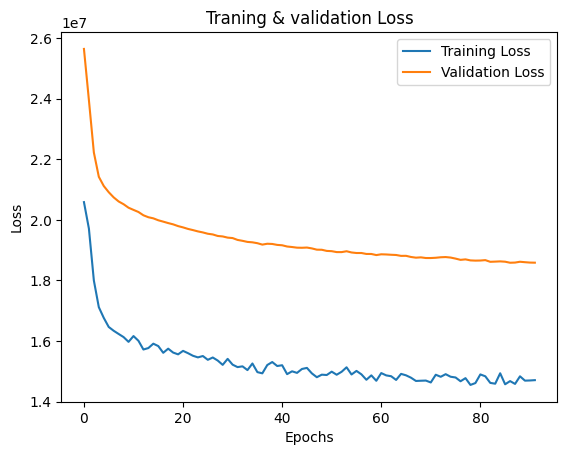

In [15]:
import matplotlib.pyplot as plt
def plot_loss(history):
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Traning & validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()
plot_loss(history)

Epoch 1/100
330/330 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 20203158.0000 - val_loss: 25669498.0000
Epoch 2/100
330/330 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 19501702.0000 - val_loss: 23814960.0000
Epoch 3/100
330/330 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 18397280.0000 - val_loss: 22117948.0000
Epoch 4/100
330/330 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 18153114.0000 - val_loss: 21413436.0000
Epoch 5/100
330/330 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 16930944.0000 - val_loss: 21111788.0000
Epoch 6/100
330/330 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 16139149.0000 - val_loss: 20925284.0000
Epoch 7/100
330/330 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 15545514.0000 - val_loss: 20763654.0000
Epoch 8/100
330/330 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 16722058.0000 - val_loss: 20651308.0000
Epoch 9/100
330/330 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 17037572.0000 - val_loss: 20542694.0000
Epoch 10/100
330/330 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 14741261.0000 - val_loss: 204

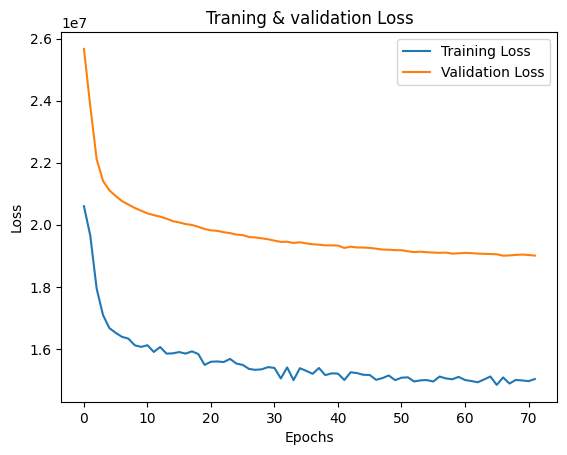

In [16]:
#applying regularization and dropout
from tensorflow.keras.regularizers import l2
from tensorflow.keras.layers import Dropout
model=Sequential()
model.add(Dense(64,input_dim=X_train.shape[1],activation='relu',kernel_regularizer=l2(0.001)))
model.add(Dropout(0.5))
model.add(Dense(32,activation='relu',kernel_regularizer=l2(0.001)))
model.add(Dropout(0.5))
model.add(Dense(1))
model.compile(optimizer='adam',loss='mean_squared_error')
early_stopping=tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=5,restore_best_weights=True)
history=model.fit(X_train,y_train,epochs=100,batch_size=32,validation_data=(X_test,y_test),callbacks=[early_stopping])
plot_loss(history)

In [17]:
model.save('emrw_model.h5')